# <b> <p align="center"> <span style="color: Pink "> PyTorch Custom Dataset <span> </p> </b>
### <b> <p align="center"> <span style="color: Green "> Food Vision mini <span> </p> </b>

## 0. Importing pytorch and set up device agnostics

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib


from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List


In [2]:
# Device agnostics
device = "cuda" if torch.cuda.is_available() else "cpu" 
device="cpu"

## 1. Get data

Our dataset is sub of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per classes(705 training and 250 testing)

Dataset starts with 3 classes of food and only 10% of the images (~ 75 training , 25 testing)

When starting our ML projects, it's important to try things on a small scale and then increase the scale when necessary 

The whole point is to speed up how fast can make experiment.

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data\rice_leaf_images directory, creating one...


In [4]:
if image_path == data_path/"pizza_steak_sushi":
    print("yes")

yes


## 2. Becoming one with the data(data preparation and data exploration)

In [5]:
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""

    for dirpath,dirname,filename in os.walk(dir_path):
        print(f"There are {len(dirname)} directory and {len(filename)} image files in the '{dirpath}' ")


walk_through_dir(data_path)

There are 2 directory and 2 image files in the 'data' 
There are 1 directory and 0 image files in the 'data\FashionMNIST' 
There are 0 directory and 8 image files in the 'data\FashionMNIST\raw' 
There are 2 directory and 0 image files in the 'data\pizza_steak_sushi' 
There are 3 directory and 0 image files in the 'data\pizza_steak_sushi\test' 
There are 0 directory and 25 image files in the 'data\pizza_steak_sushi\test\pizza' 
There are 0 directory and 19 image files in the 'data\pizza_steak_sushi\test\steak' 
There are 0 directory and 31 image files in the 'data\pizza_steak_sushi\test\sushi' 
There are 3 directory and 0 image files in the 'data\pizza_steak_sushi\train' 
There are 0 directory and 78 image files in the 'data\pizza_steak_sushi\train\pizza' 
There are 0 directory and 75 image files in the 'data\pizza_steak_sushi\train\steak' 
There are 0 directory and 72 image files in the 'data\pizza_steak_sushi\train\sushi' 


In [6]:
# Setup train and testing paths 

train_dir = image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize an image

Let's write some code to :
 
 1. Get all of the image paths
 2. Pick a random image path using Python's random.choice()
 3. Get the image class name using `pathlib.Path.parent.stem`
 4. Since we're working with image, let's open the image with Python's PIL
 5. We'll then show the image and print metadata

In [7]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [8]:
import random


random.randint(1,100)

1

sushi
Random image path: data\pizza_steak_sushi\test\sushi\1245193.jpg
image class : sushi
image_height: 295
image widht: 512


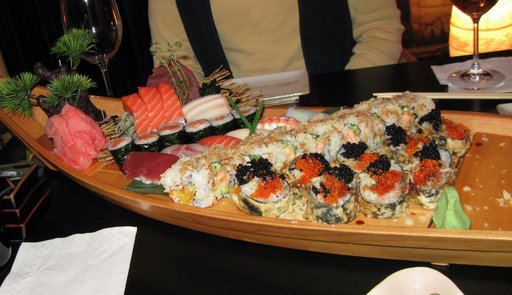

In [9]:
import random
from PIL import Image

# Set seed
random.seed(random.randint(1,100))

# 1. Get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

# 2. Pick a random image path
random_image_path= random.choice(image_path_list)
random_image_path

# 3. Get image class from path name ( the class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image

img= Image.open(random_image_path) #opening an image using Python Image Liabrary (PIL)

# 5. Print metadata

print(f"Random image path: {random_image_path}")
print(f"image class : {image_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img

Try to visualize image/images with matplotlib

Random image path: data\pizza_steak_sushi\train\sushi\268990.jpg
image class : sushi
image_height: 512
image widht: 384


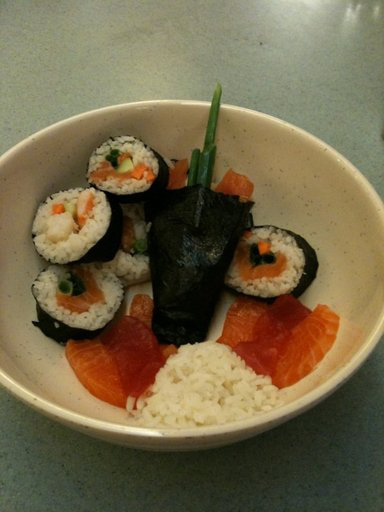

In [10]:
torch.manual_seed(random.randint(1,100))

# 1. get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

# 2. pick a random image path
random_image_path=random.choice(image_path_list)
random_image_path

# 3. viewing the random image class
img_class=random_image_path.parent.stem
img_class

# 4. open the random image
img=Image.open(random_image_path)
img

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"image class : {image_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img



Text(0.5, 1.0, 'Image class: sushi | Image shpape : (512, 384, 3) -> [hight, width , color_channel]')

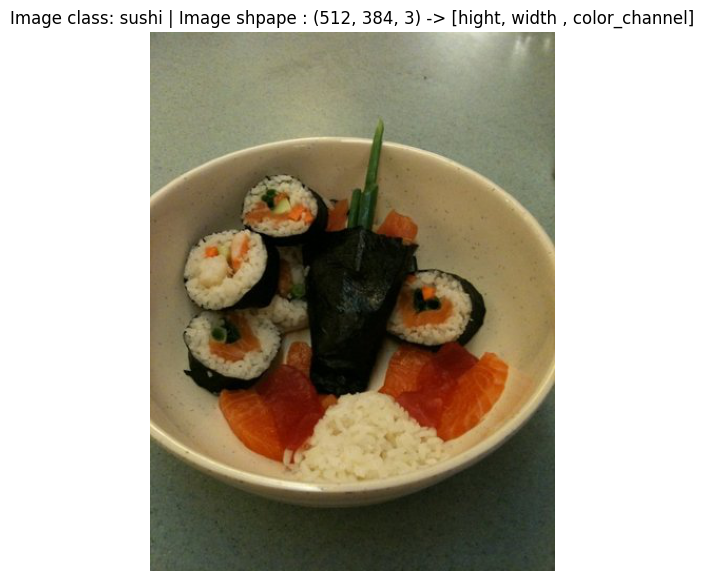

In [11]:
# Turn the image into array

img_array=np.asarray(img)
img_array

# Plot the image with matplotlib

plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.axis(False)
title_des=f"Image class: {image_class} | Image shpape : {img_array.shape} -> [hight, width , color_channel]"
plt.title(title_des)

## 3. Transforming Data 

Before we can use our image data with pytorch :
 
 1. Turn your target data into tensor( in this case, numerical representation of our images)
 2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` we'll call these `Dataset` and `DataLoader`

In [12]:
from torch.utils.data import DataLoader
from torchvision import datasets ,transforms

### 3.1 Transform data with `torchvision.transforms`

In [13]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()

])

In [14]:
data_transform(img).shape

torch.Size([3, 64, 64])

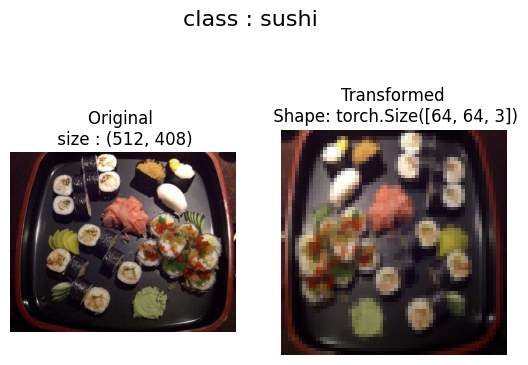

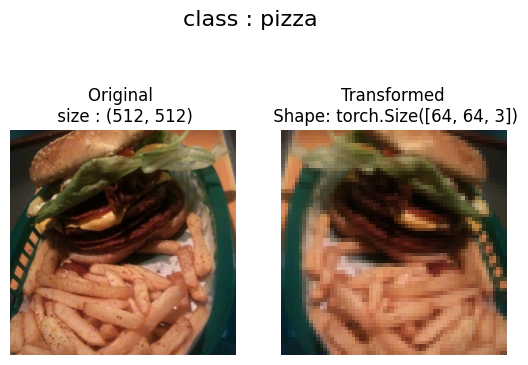

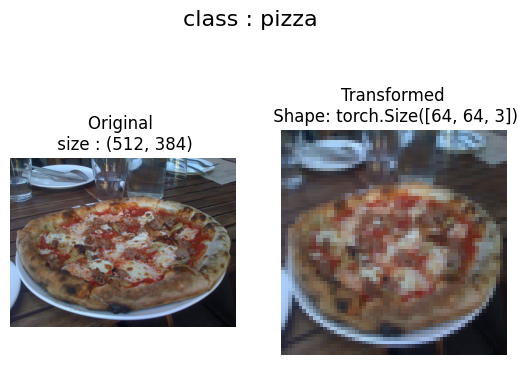

In [15]:
def plot_transformed_images(image_path_list,transforms,n=3,seed=None):

    """
    Selects random images from a path of images and loads/transforms them 
    then plots original vs the transformed version
    """

    if seed:
        random.seed(seed)
    
    random_image_path=random.sample(image_path_list,k=n)
    
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \n size : {f.size}")
            ax[0].axis(False)

            # Transform and plot target image

            transformed_image=transforms(f).permute(1,2,0) # note need to chagne shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n Shape: {transformed_image.shape}")
            ax[1].axis(False)


            fig.suptitle(f"class : {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_path_list=image_path_list,
                        transforms=data_transform,
                        seed=42,
                        n=3)




## 4. Options 1: Loading image data using `ImageFolder`
We can load image classification data using `torchvision.datasets.ImageFolder`

In [16]:
# using ImageFolder to create dataset(s)

from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform, #transform for the data
                                target_transform=None, #a transform for the label/target
                                )

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform,
                               target_transform=None)

train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
train_data.root

WindowsPath('data/pizza_steak_sushi/train')

In [18]:
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [19]:
# Get class name as list

class_name=train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [20]:
# Get class names as dict

class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
# Check the lenght of our dataset

len(train_data) , len(test_data)

(225, 75)

In [22]:
train_data.samples[0],train_data.targets[0]

(('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0), 0)

In [23]:
# Index on the train_data Dataset to get a single image and label/target

train_data[0][0]

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [24]:
train_data[0][1]

0

In [25]:
img, label= train_data[0][0] , train_data[0][1]

print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype : {img.dtype}")
print(f"Label data: {type(label)}")
print(f"Class name: {class_name[label]}")


Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original : torch.Size([3, 64, 64]) -> [color_channel,height,width]
Image permute: tensor([[[0.1176, 0.0588, 0.0196],
         [0.1216, 0.0588, 0.0196],
         [0.1255, 0.0588, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902],
         [0.1137, 0.0745, 0.0941]],

        [[0.1294, 0.0627, 0.0196],
         [0.1294, 0.0627, 0.0157],
         [0.1294, 0.0627, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.0980, 0.0706, 0.0863],
         [0.1059, 0.0706, 0.0902]],

        [[0.1333, 0.0706, 0.0196],
         [0.1333, 0.0706, 0.0157],
         [0.1333, 0.0706, 0.0157],
         ...,
         [0.0941, 0.0745, 0.0902],
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902]],

        ...,

        [[0.1686, 0.2392, 0.1804],
         [0.1647, 0.2392, 0.1882],
         [0.1686, 0.2510, 0.1961],
         ...,
         [0.1255, 0.1373, 0.1490],
         [0.1098, 0.1333, 0.1333],
         [0.1098, 0.1255, 0.1294]],



Text(0.5, 1.0, 'pizza')

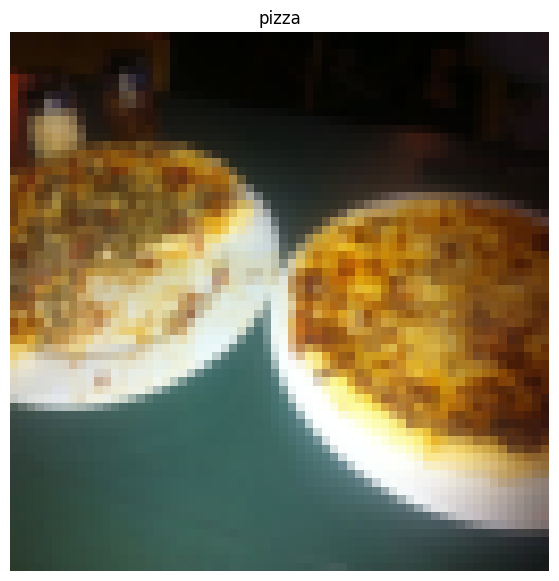

In [26]:
# Rearrange the order dimension

img_permute = img.permute(1,2,0)

# Print our different shape
print(f"Original : {img.shape} -> [color_channel,height,width]")
print(f"Image permute: {img_permute} ->[height,widht,color_channel]")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_name[label])

### 4.1 Turn loaded images into DataLoaders's

A DataLoader is going to help us turn our Dataset's into iterable and we cal customize our 

In [27]:
import os 
os.cpu_count()

8

In [28]:
# Turn train and test datasets into DataLoader


BATCH_SIZE=1
train_dataloader=DataLoader(train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=True)

test_datalaoder=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=False)

In [29]:
len(train_dataloader),len(test_datalaoder)

(225, 75)

In [30]:
img,label=next(iter(train_dataloader))

# Batch size is now only 1 , can chage the batch size when want to do

print(f"image shape: {img.shape} -> [batch_size, color_channel, height, width]")
print(f"Label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channel, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading image data with a custom `Dataset`
  
  1. Want to be able to load images from file
  2. Want to be able to get class names from the Dataset
  3. Want to be able to get classes as dictionary from the Dataset

Pros:

  * Create a `Dataset` out of almost anything
  * Not limited to PyTorch pre-built `Dataset` functions

Cons:
  * Even through you could create `Dataset` out of almost anything, it doesn't mean it will work...
  * Using a custom `Dataset` often result in us writing more code, which could be prone to errors or performance issues


All custom datasets in PyTorch, often subclass: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [31]:
# Instance of torchVision.datasets.ImageFolder()

train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Create a helper function to get class names

We want a function to :
 
 1. Get the class names using `os.scandir()` to traverse a target directory(ideally the directory is in satandard image clasification format).
 2. Raise an error if the class names aren't found (if this happens, there might be something worng with the directory structure)
 3. Turn the class names into a dict and a list and return them
 

In [32]:
list(os.scandir(image_path/"train"))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [33]:
# Setup path for target directory

target_directory = train_dir

print(f"Target dir: {target_directory}")

# Get the class names from the target directory

class_name_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [34]:
def find_classes(directory:str) -> Tuple[List[str] , Dict[str,int]]:

    """ Finds the class folder names in a target directory """

    # 1. Get the classes names by scanning the target directory

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Rasie an error if class names could not be found

    if not classes:
        raise FileNotFoundError(f"Coundn't find any classes in {directory} ..... Please check file structure. ")
    

    # 3. Create a dictionary of index labels (computer prefer numbers rather than strings as labels)
    class_to_idx= {class_name : i for i , class_name in enumerate(classes)}
    
    return classes , class_to_idx

In [35]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageLoader`

To create our own custom dataset, we want to:
  
  1. Subclass `torch.utils.data.Dataset`
  2. Init our subclass with a targer directory ( the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
  3. Create several attributes:  
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes 
    * class_to_idx - a dict of the target classes mapped to integer labels
  4. Create a function `load_image()` , this function of our dataset
  5. Overwrite the `__len__()` method to return the length of our dataset
  6. Overwrite the `__getitem()__` method to returnn a simple when passed an index


In [36]:
# 0. Write  a custom dataset Class 
from torch.utils.data import Dataset

# 1. SubClass torch.utils.data.Dataset

class ImageFolderCustom(Dataset):
     # 2. Initailize our custom dataset
     def __init__(self, targ_dir:str,transform=None):
          
          # 3. Create class attribute

          # Get all of the image paths
          self.path = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

          # Setup transform
          self.transform=transform

          # Create classes and class_to_idx attributes
          self.classes , self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images

     def load_image(self, index:int) -> Image.Image:

          "open and image via a path and return it."
          image_path=self.path[index]
          return Image.open(image_path)
     
     # 5. Overwrite __len__()

     def __len__(self) ->int:
          "Returns the total number of samples"
          return len(self.path)
     
     # 6. Overwrite __getitem__() method to return a particular sample

     def __getitem__(self, index:int) -> Tuple[torch.Tensor ,int]:

          "Return one sample of data , datas and label (X,y)."
          img=self.load_image(index)
          class_name=self.path[index].parent.name # Expect path in format: data_folder/class_name.image.jpg
          class_idx=self.class_to_idx[class_name]

          # Transform if necessary 

          if self.transform:
               return self.transform(img),class_idx # return data, label (X,y) 
          else:
               return img, class_idx # return untrasform image and lable


    

In [37]:
# Create a transform

train_transforms=transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
])

test_transforms=transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
])


In [38]:
# Test out ImageFolderCustom

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [39]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1d6954f3b50>,
 <__main__.ImageFolderCustom at 0x1d6954f3490>)

In [40]:
len(train_data) , len(train_data_custom)

(225, 225)

In [41]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [42]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [43]:
# Check for equality between original ImageFolder Database and ImageFolder

print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


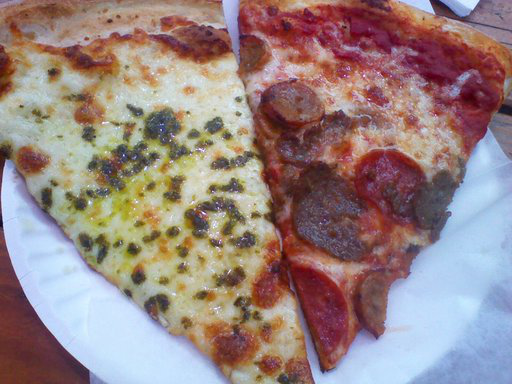

In [44]:
train_data_custom.load_image(12)

### 5.3 Create a function to display random iamges
  
  1. Take in  a 'Dataset` and a number of other parameters such as class names and how many images to visualize.
  2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
  3. Set the random seed for  reproductibility
  4. Get a list of random sample indexes from the target dataset.
  5. Setup a matplotlib plot .
  6. Loop through the random sample images and plot them with matplotlib
  7. Make sure the dimensions of our imags line up with matplotlib(HWC)

In [45]:
# 1. Create a function to take a dataset

def display_random_images(datasets: torch.utils.data.Dataset,
                          classes : List[str]=None,
                          n: int =10,
                          seed: int=None,
                          display_shape:bool=True):
    # 2. Adjust display if n is too high
    if n>10:
        n=10
        display_shape=False
        print(f"For display purpose, n shouldn't be larger than 10, setting to 10 and removing shape display. ")

    # 3. Set the seed
    
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes 
    radom_sample_idx=random.sample(range(len(datasets)),k=n)
    
    # Set up matplotlib and loop through the random sample
    plt.figure(figsize=(27,9))

    # 6. loop through random indexes and plot them with matplotlib
    for i in range(0,n):
        targ_img,targ_label=datasets[radom_sample_idx[i]][0], datasets[radom_sample_idx[i]][1]

        # 7. Adjust the dimension for ploting
        targ_img_adjust=targ_img.permute(1,2,0)

        # Plot adjusted samples
        plt.subplot(1,n,i+1)
        plt.imshow(targ_img_adjust)
        plt.axis(False)
        if classes :
            title=f"Classes : {classes[targ_label]}"

            if display_shape:
                title = title + f"\n Shape : {targ_img_adjust.shape}"

        plt.title(title)
        
        
        






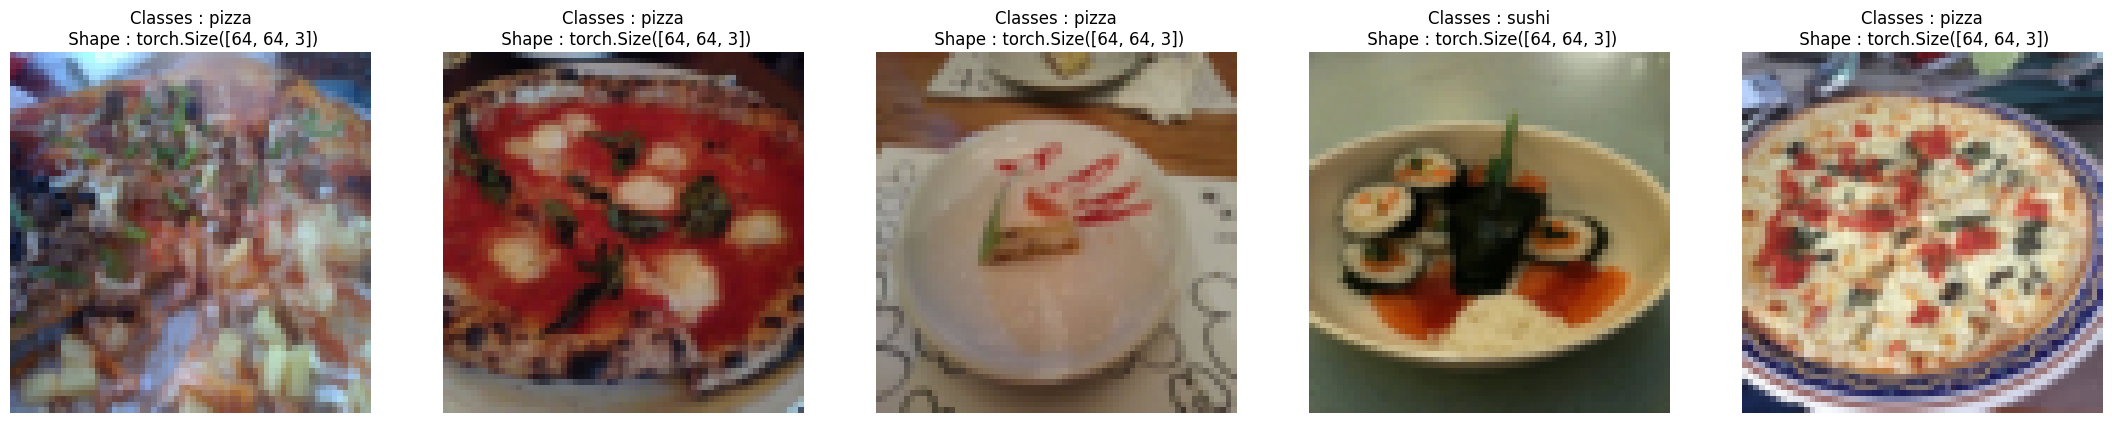

In [46]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      classes=train_data.classes,
                      n=5,
                      seed=None)

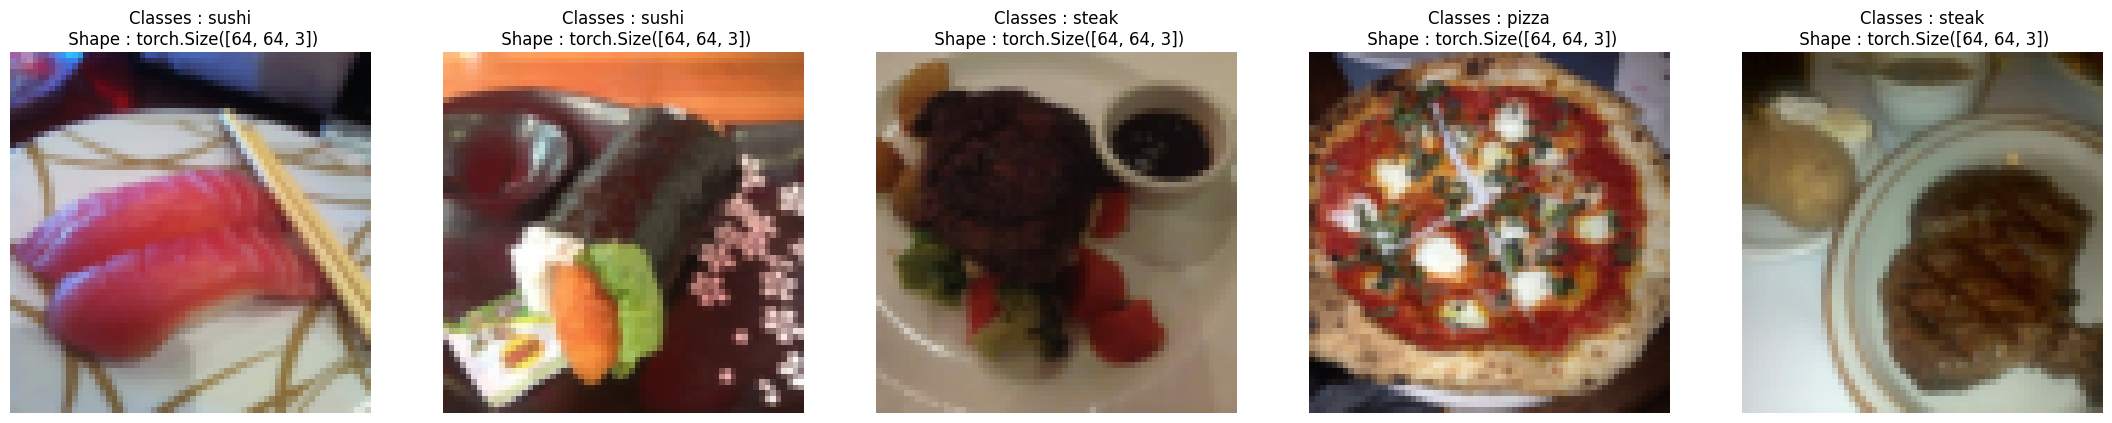

In [47]:
# Dataset random images from the ImageFolderCustom created dataset

display_random_images(train_data_custom,
                      classes=train_data_custom.classes,
                      n=5,
                      seed=None)

### 5.4 Turn custom loaded images into DataLoader's

In [48]:
BATCH_SIZE=1
train_dataloader_custom=DataLoader(dataset=train_data_custom,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,)

test_dataloader_custom=DataLoader(dataset=test_data,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  )

In [49]:
train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1d695b37cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x1d695b37bb0>)

In [50]:
# Get image and label from custom dataloader

img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shape

img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Other form transform (data augmentation)

Data augmentation is the process of artificailly adding diversity to your training data.

In the case of image data, this may mean applying various transformations to the training images.

This practice hopefully results in a model that's more generalized to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models state of art levels.....

In [51]:
# Let's look at trivialAugment : link

from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
                                      ])

test_transform= transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                    transforms.ToTensor()])

Random image path: data\pizza_steak_sushi\train\steak\421476.jpg
image class : steak
image_height: 512
image widht: 512


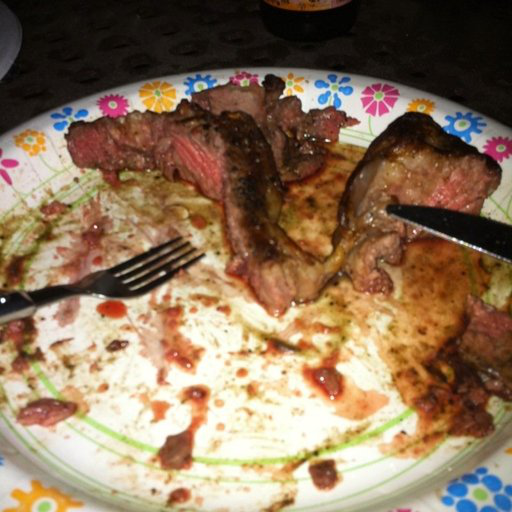

In [52]:
# Get all the image path

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

# Plot random Image

random_image_path=random.choice(image_path_list)
random_image_path

# Find the class of random image path 

random_image_path_class=random_image_path.parent.stem
random_image_path_class

# Open Image with PIL
img=Image.open(random_image_path)
# 5. Print metadata

print(f"Random image path: {random_image_path}")
print(f"image class : {random_image_path_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img

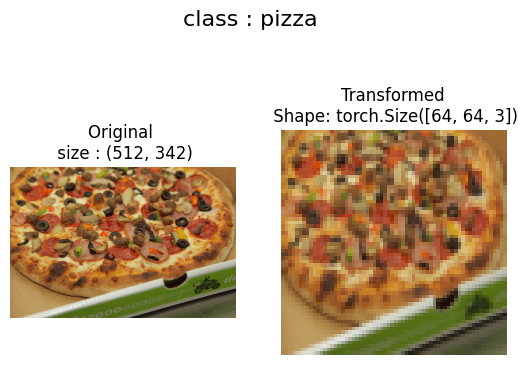

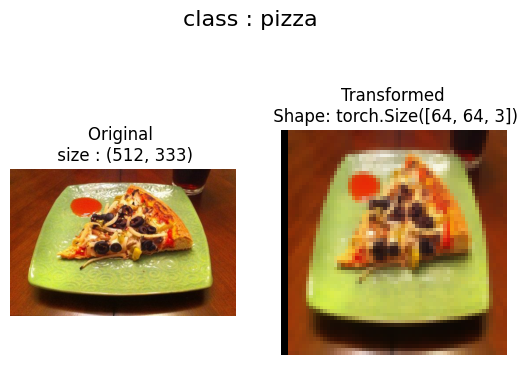

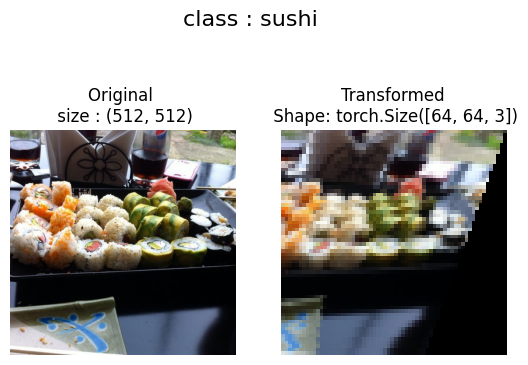

In [53]:
# Plot random transform image

plot_transformed_images(image_path_list=image_path_list,
                        transforms=train_transform,
                        n=3,
                        seed=None)

## 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architechture from the CNN Explainer websites : 


### 7.1 Creating transforms and loading data for Model 0

In [54]:
# Create sample transform 

simple_transform = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()
])


In [55]:
# 1. Load and transform data 
from torchvision import datasets

train_data_simple=datasets.ImageFolder(root=train_dir,
                                       transform=simple_transform,
                                       target_transform=None)

test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform,
                                      target_transform=None)

# 2. Turn the dataset into DataLoader



  # Setup batch size and number of works

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

  # Create DataLoader's 

train_dataloader_simple=DataLoader(dataset=train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,
                                   num_workers=NUM_WORKERS)


test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG model class  

In [56]:
class TinyVGG(nn.Module):
    """
    Model architechture copying TinyVGG from CNN Explainer: 

    """
    def __init__(self,
                 input_shape:int,
                 hidden_unit:int,
                 output_shape:int)-> None:
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                       out_channels=hidden_unit,
                       kernel_size=3,
                        stride=1,
                        padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
             
                                        
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                       out_channels=hidden_unit,
                       kernel_size=3,
                        stride=1,
                        padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
             
                                        
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*13*13,
                      out_features=output_shape)
        )
    
    def forward(self,x):

        x=self.conv_block_1(x)
        # print(f"By passing through block 1, Getting shape: {x.shape}")
        x=self.conv_block_2(x)
        # print(f"By passing through block 2, getting shape {x.shape}")
        x=self.classifier(x)

        return x

In [57]:
model_0=TinyVGG(input_shape=3,
        hidden_unit=10,
        output_shape=len(class_name)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [58]:
# Get a single image batch

image_batch, label_batch=next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [59]:
# Try a forward pass

model_0(image_batch.to(device))

tensor([[-0.0196,  0.0162, -0.0393],
        [-0.0236,  0.0185, -0.0385],
        [-0.0244,  0.0158, -0.0396],
        [-0.0147,  0.0158, -0.0362],
        [-0.0198,  0.0227, -0.0363],
        [-0.0215,  0.0176, -0.0396],
        [-0.0211,  0.0165, -0.0373],
        [-0.0193,  0.0171, -0.0381],
        [-0.0157,  0.0207, -0.0403],
        [-0.0219,  0.0178, -0.0380],
        [-0.0223,  0.0171, -0.0399],
        [-0.0224,  0.0146, -0.0386],
        [-0.0238,  0.0173, -0.0390],
        [-0.0186,  0.0168, -0.0377],
        [-0.0228,  0.0149, -0.0422],
        [-0.0225,  0.0182, -0.0417],
        [-0.0224,  0.0208, -0.0385],
        [-0.0210,  0.0212, -0.0398],
        [-0.0226,  0.0165, -0.0393],
        [-0.0235,  0.0187, -0.0370],
        [-0.0196,  0.0155, -0.0367],
        [-0.0217,  0.0211, -0.0402],
        [-0.0228,  0.0139, -0.0372],
        [-0.0218,  0.0169, -0.0383],
        [-0.0234,  0.0195, -0.0363],
        [-0.0203,  0.0148, -0.0418],
        [-0.0253,  0.0177, -0.0402],
 

### 7.4 use TorchInfo to get an idea of the shapes going through our model

In [93]:
# Install torchinfo , import if it's available

try:
    import torchinfo
except:
    ! pip install torchinfo
    import torchinfo

In [94]:
from torchinfo import summary

summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Create train and test loops functions

 * `train_step()` - takes in a model and dataloader and trains the model on the dataloader.

 * `test_step()` - takes in a model and dataloader and evaluate the on the dataloader.

In [62]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [63]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Create a `train()` function to combile `train_step()` and `test_step()`

In [64]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [65]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_unit=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3116
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3320 | test_loss: 1.0698 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0862 | train_acc: 0.4922 | test_loss: 1.0799 | test_acc: 0.5227
Epoch: 4 | train_loss: 1.0826 | train_acc: 0.4102 | test_loss: 1.0598 | test_acc: 0.5729
Epoch: 5 | train_loss: 1.0631 | train_acc: 0.4141 | test_loss: 1.0612 | test_acc: 0.5540
Total training time: 85.952 seconds


In [66]:
model_0_results

{'train_loss': [1.106342539191246,
  1.099502295255661,
  1.0862251222133636,
  1.0826085805892944,
  1.0630662739276886],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_loss': [1.0983145634333293,
  1.069807767868042,
  1.079912265141805,
  1.0598466793696086,
  1.061161478360494],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

### 7.8 Plot the loss curves of Model 0

A **loss curve** is a way of tracking your model's progress over time.

A good guide for different loss curves can be seen here: https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

In [67]:
# Get the model_0_results keys

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [68]:
def plot_loss_curve(result: Dict[str, List[float]]):
    """ plot traning curve of a result dictionary."""

    # Get the loss values of the results dictionary(training and test)

    loss=result["train_loss"]
    test_loss=result["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)

    accuracy = result["train_acc"]
    test_accuracy=result["test_acc"]


    # Figure out how many epochs there were 

    epochs=range(len(result["train_loss"]))

    #Setup a plot

    plt.figure(figsize=(15,7))

    # Plot the loss

    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label="train_loss")
    plt.plot(epochs,test_loss,label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.legend()

    # Plot the accuracy

    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label="train_accuracy")
    plt.plot(epochs,test_accuracy,label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()





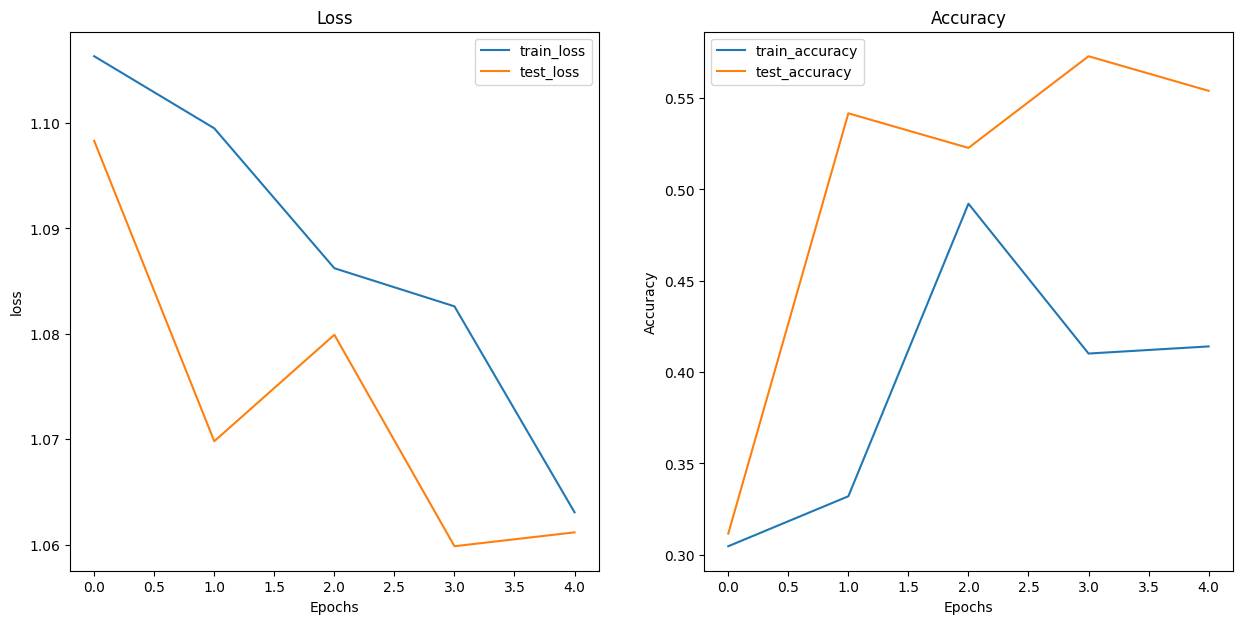

In [69]:
plot_loss_curve(model_0_results)

## 8. What should an ideal loss curve look like?

Looking at training and test loss curves is a great way to see if your model is **overfitting**.

An overfitting model is one that performs better (often by a considerable margin) on the training set than the validation/test set.

If your training loss is far lower than your test loss, your model is **overfitting**.

As in, it's learning the patterns in the training too well and those patterns aren't generalizing to the test data.

The other side is when your training and test loss are not as low as you'd like, this is considered **underfitting**.

The ideal position for a training and test loss curve is for them to line up closely with each other.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="different training and test loss curves illustrating overfitting, underfitting and the ideal loss curves" width="800"/>

*Left: If your training and test loss curves aren't as low as you'd like, this is considered **underfitting**. *Middle:* When your test/validation loss is higher than your training loss this is considered **overfitting**. *Right:* The ideal scenario is when your training and test loss curves line up over time. This means your model is generalizing well. There are more combinations and different things loss curves can do, for more on these, see Google's [Interpreting Loss Curves guide](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic).*

### 8.1 How to deal with overfitting

Since the main problem with overfitting is that you're model is fitting the training data *too well*, you'll want to use techniques to "reign it in".

A common technique of preventing overfitting is known as [**regularization**](https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html).

I like to think of this as "making our models more regular", as in, capable of fitting *more* kinds of data.

Let's discuss a few methods to prevent overfitting.

| **Method to prevent overfitting** | **What is it?** |
| ----- | ----- |
| **Get more data** | Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples. | 
| **Simplify your model** | If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer. | 
| **Use data augmentation** | [**Data augmentation**](https://developers.google.com/machine-learning/glossary#data-augmentation) manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data. |
| **Use transfer learning** | [**Transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning) involves leveraging the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images. |
| **Use dropout layers** | Dropout layers randomly remove connections between hidden layers in neural networks, effectively simplifying a model but also making the remaining connections better. See [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) for more. | 
| **Use learning rate decay** | The idea here is to slowly decrease the learning rate as a model trains. This is akin to reaching for a coin at the back of a couch. The closer you get, the smaller your steps. The same with the learning rate, the closer you get to [**convergence**](https://developers.google.com/machine-learning/glossary#convergence), the smaller you'll want your weight updates to be.  |
| **Use early stopping** | [**Early stopping**](https://developers.google.com/machine-learning/glossary#early_stopping) stops model training *before* it begins to overfit. As in, say the model's loss has stopped decreasing for the past 10 epochs (this number is arbitrary), you may want to stop the model training here and go with the model weights that had the lowest loss (10 epochs prior). |

There are more methods for dealing with overfitting but these are some of the main ones.

As you start to build more and more deep models, you'll find because deep learnings are *so good* at learning patterns in data, dealing with overfitting is one of the primary problems of deep learning.

### 8.2 How to deal with underfitting 

When a model is [**underfitting**](https://developers.google.com/machine-learning/glossary#underfitting) it is considered to have poor predictive power on the training and test sets.

In essence, an underfitting model will fail to reduce the loss values to a desired level.

Right now, looking at our current loss curves, I'd considered our `TinyVGG` model, `model_0`, to be underfitting the data.

The main idea behind dealing with underfitting is to *increase* your model's predictive power.

There are several ways to do this.

| **Method to prevent underfitting** | **What is it?** |
| ----- | ----- |
| **Add more layers/units to your model** | If your model is underfitting, it may not have enough capability to *learn* the required patterns/weights/representations of the data to be predictive. One way to add more predictive power to your model is to increase the number of hidden layers/units within those layers. | 
| **Tweak the learning rate** | Perhaps your model's learning rate is too high to begin with. And it's trying to update its weights each epoch too much, in turn not learning anything. In this case, you might lower the learning rate and see what happens. |
| **Use transfer learning** | Transfer learning is capable of preventing overfitting and underfitting. It involves using the patterns from a previously working model and adjusting them to your own problem. |
| **Train for longer** | Sometimes a model just needs more time to learn representations of data. If you find in your smaller experiments your model isn't learning anything, perhaps leaving it train for a more epochs may result in better performance. |
| **Use less regularization** | Perhaps your model is underfitting because you're trying to prevent overfitting too much. Holding back on regularization techniques can help your model fit the data better. |

### 8.3 The balance between overfitting and underfitting

None of the methods discussed above are silver bullets, meaning, they don't always work.

And preventing overfitting and underfitting is possibly the most active area of machine learning research.

Since everone wants their models to fit better (less underfitting) but not so good they don't generalize well and perform in the real world (less overfitting).

There's a fine line between overfitting and underfitting.

Because too much of each can cause the other.

Transfer learning is perhaps one of the most powerful techniques when it comes to dealing with both overfitting and underfitting on your own problems.

Rather than handcraft different overfitting and underfitting techniques, transfer learning enables you to take an already working model in a similar problem space to yours (say one from [paperswithcode.com/sota](https://paperswithcode.com/sota) or [Hugging Face models](https://huggingface.co/models)) and apply it to your own dataset.

We'll see the power of transfer learning in a later notebook.

## 9. Mode 1: TinyVGG with Data Augmentation

Now let's try another modelling experiment this time using the same  model as before with some data agumentation

### 9.1 Create transform with data augmentation

In [70]:
# Create training transform with TrivialAugment

from torchvision import transforms

train_transform_trivial=transforms.Compose([transforms.Resize(size=(64,64)),
                                            transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                            transforms.ToTensor()])

test_transform_trivial=transforms.Compose([transforms.Resize(size=(64,64)),
                                           transforms.ToTensor()])


### 9.2 Create train and test `Dataset`'s and `DataLoader` with data Augmentation

In [71]:
# Create train and test datasets
train_data_augmented=datasets.ImageFolder(root=train_dir,
                                        transform=train_transform_trivial,
                                        target_transform=None
                                        )
test_data_simple=datasets.ImageFolder(root=test_dir,
                                       transform=test_transform_trivial)

In [72]:
# Create train and test dataloader

import torch.utils
import torch.utils.data


train_dataloader_augmented=torch.utils.data.DataLoader(dataset=train_data_augmented,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     num_workers=NUM_WORKERS)

test_dataloader_simple=torch.utils.data.DataLoader(dataset=test_data_simple,
                                                    shuffle=False,
                                                    batch_size=BATCH_SIZE,
                                                    num_workers=NUM_WORKERS)

### 9.3 Construct and train model_1 

This time we'll be using the same model architecture except this time we've augmented the training data.

In [73]:
model_1=TinyVGG(
    input_shape=3,
    hidden_unit=10,
    output_shape=len(train_data_augmented.classes)
).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Wonderful ! Now we'v a model and dataloaders, let's create a loss function and cell upon our `train()` functions to train and evaluate our model

In [74]:
# Set random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup loss function

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),
                           lr=.001)

# Start the timer 

from timeit import default_timer as timer 

start_time=timer()

# Train model 1 

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)


# End the timer and print out how long it took

end_time =timer()
print(f"Total training time for model 1 : {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0996 | train_acc: 0.2812 | test_loss: 1.0947 | test_acc: 0.4441
Epoch: 2 | train_loss: 1.0885 | train_acc: 0.5859 | test_loss: 1.0941 | test_acc: 0.3741
Epoch: 3 | train_loss: 1.0634 | train_acc: 0.4844 | test_loss: 1.1098 | test_acc: 0.3021
Epoch: 4 | train_loss: 1.0208 | train_acc: 0.5273 | test_loss: 1.1205 | test_acc: 0.2604
Epoch: 5 | train_loss: 0.9479 | train_acc: 0.5625 | test_loss: 1.0963 | test_acc: 0.3229
Total training time for model 1 : 105.660 seconds


In [75]:
model_1_results

{'train_loss': [1.0995875298976898,
  1.0885024219751358,
  1.0634444057941437,
  1.020798236131668,
  0.9479439929127693],
 'train_acc': [0.28125, 0.5859375, 0.484375, 0.52734375, 0.5625],
 'test_loss': [1.0947121779123943,
  1.0941076676050823,
  1.1097631653149922,
  1.1205081343650818,
  1.096303939819336],
 'test_acc': [0.4441287878787879,
  0.3740530303030303,
  0.3020833333333333,
  0.2604166666666667,
  0.3229166666666667]}

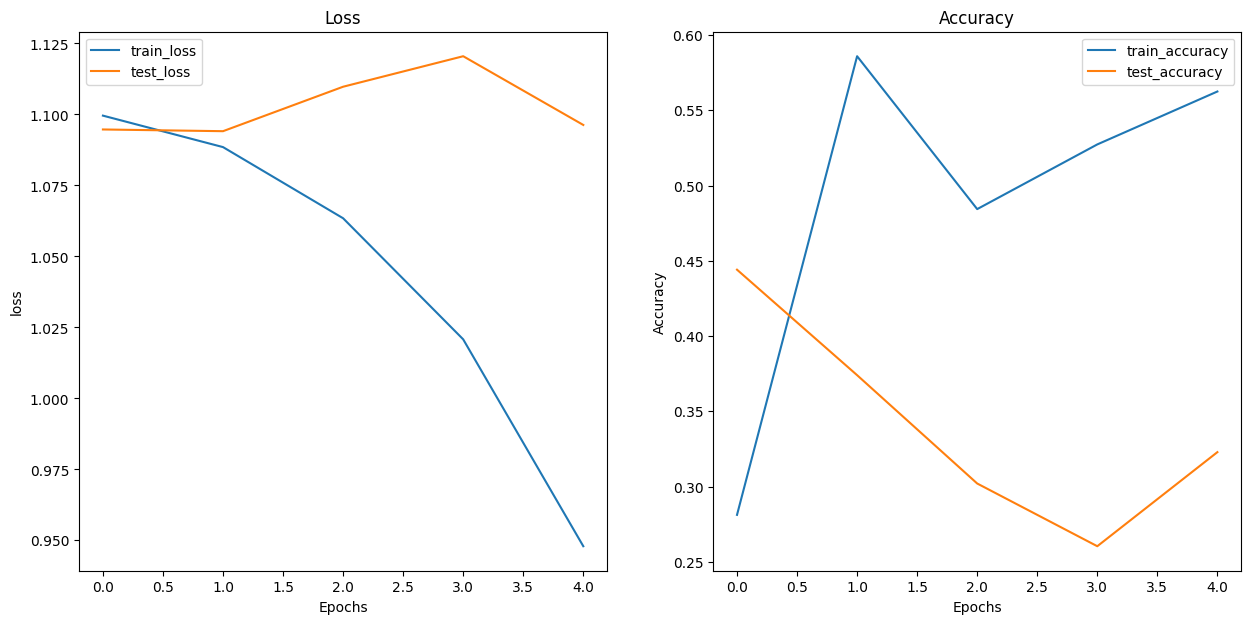

In [76]:
plot_loss_curve(model_1_results)

## 10. Compare model results

After evaluating our modelling experiments on their own, it's important to compare then each other . 

There are a few different ways to do this:
  * Hard coding (what we are doing)
  * PyTorch + tensorboard
  * Weight and bias
  * MLFlow


In [77]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df


train_loss  train_acc  test_loss  test_acc
0    1.106343   0.304688   1.098315  0.311553
1    1.099502   0.332031   1.069808  0.541667
2    1.086225   0.492188   1.079912  0.522727
3    1.082609   0.410156   1.059847  0.572917
4    1.063066   0.414062   1.061161  0.553977

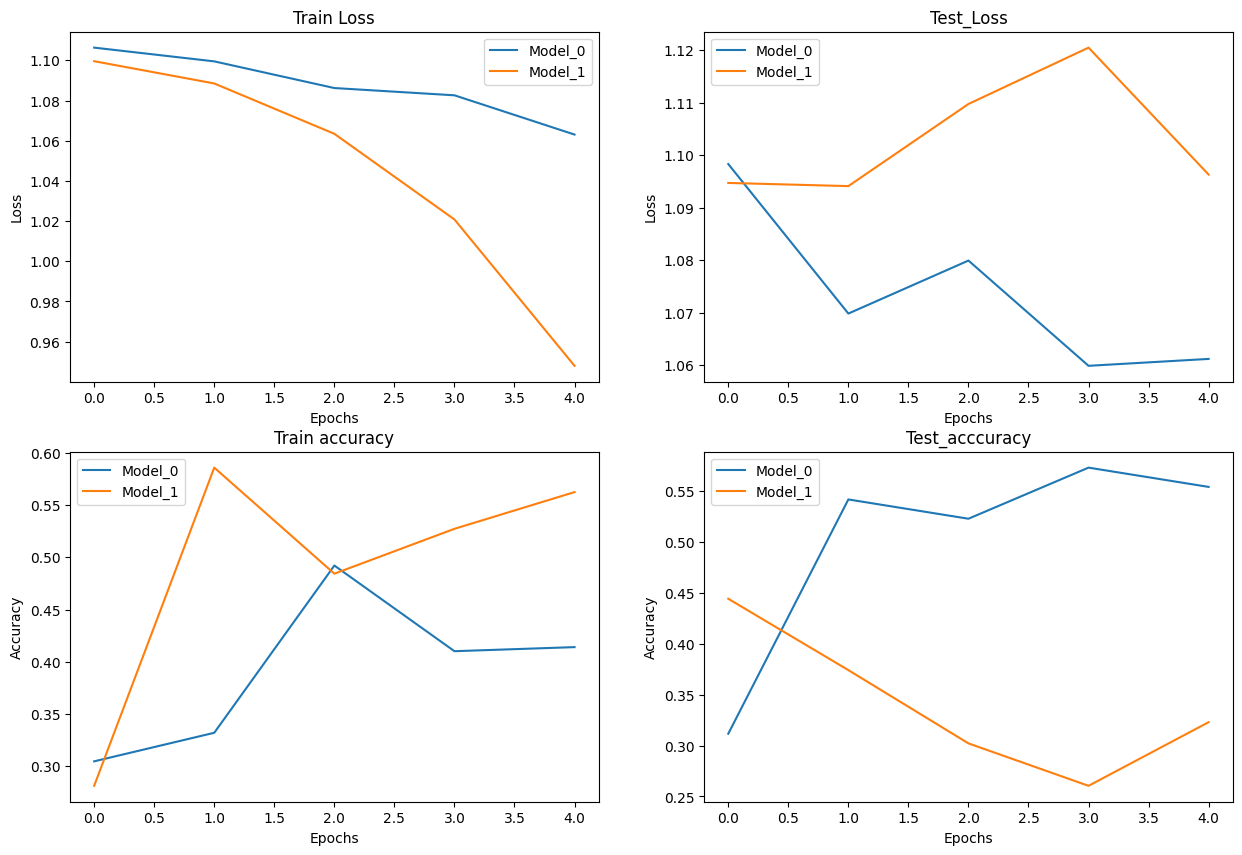

In [78]:
# Setupa a plot

plt.figure(figsize=(15,10))

# Get number of epochs

epochs=range(len(model_0_df))

# Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"],label="Model_0")
plt.plot(epochs,model_1_df["train_loss"],label="Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot test loss
plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"],label="Model_0")
plt.plot(epochs,model_1_df["test_loss"],label="Model_1")
plt.title("Test_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot train accuracy
plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_acc"],label="Model_0")
plt.plot(epochs,model_1_df["train_acc"],label="Model_1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot test accuracy
plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"],label="Model_0")
plt.plot(epochs,model_1_df["test_acc"],label="Model_1")
plt.title("Test_acccuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## 11. Making a prediction on a custom image

Although we've train a model on custom data.... how do you make prediction on a sample/image that's not either traning or testing dataset.

In [79]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")




data\04-pizza-dad.jpeg already exists, skipping download.


### 11.1 Loading in a custom image with PyTorch

we have to make sure our custom image is in the same format as the data our model was trained on.

 * In tensor form with datatyep(torch.float32)
 * Of Shpae 64x64x3
 * On the right device

In [80]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

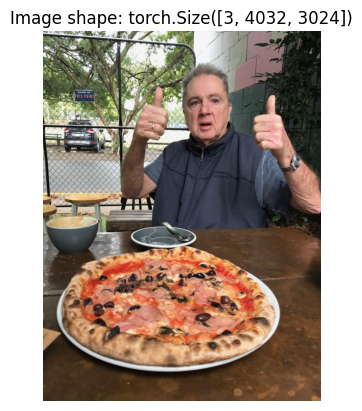

In [81]:
# Plot custom image

custom_image=custom_image_uint8

plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

### 11.2 Predicting on custom images with a trained PyTorch model

In [83]:
# Try to make a prediction on an image in unit8 format
"""
model_1.eval()
custom_image.to(device)
with torch.inference_mode():
    y_logits=model_1(custom_image)
    y_pred=torch.softmax(y_logits,dim=0).argmax(dim=1)
    print(y_pred)

"""

'\nmodel_1.eval()\ncustom_image.to(device)\nwith torch.inference_mode():\n    y_logits=model_1(custom_image)\n    y_pred=torch.softmax(y_logits,dim=0).argmax(dim=1)\n    print(y_pred)\n\n'

In [84]:
# Load in the custom image and covert to torch.float32

custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [85]:
custom_image_transform=transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_transform=custom_image_transform(custom_image)

In [86]:
model_1.eval()
custom_image_transform.to(device)
with torch.inference_mode():
    y_logits=model_1(custom_image_transform.unsqueeze(0))
    y_pred=torch.softmax(y_logits,dim=0).argmax(dim=1)
    print(class_name[y_pred.item()])

pizza


**Note** to make a prediction on custom image we had to:
 
 * Load the image and turn it into a tensor
 * Make sure the image was the same datatype as the model(torch.float32)
 * Make sure the image shape as the data model was trained on (3,64,64) with a batch size... (1,3,64,64)
 * Make sure the image was on the same device as our model

In [87]:
model_1.cuda()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 11.3 Putting custom image prediction together: building a function

Doing all of the above steps every time you'd like to make a prediction on a custom image would quickly become tedious.

So let's put them all together in a function we can easily use over and over again.

Specifically, let's make a function that:
1. Takes in a target image path and converts to the right datatype for our model (`torch.float32`).
2. Makes sure the target image pixel values are in the range `[0, 1]`.
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.

A fair few steps but we've got this!

In [90]:
custom_image_transform=transforms.Compose([transforms.Resize(size=(64,64))])

In [91]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform is not None:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

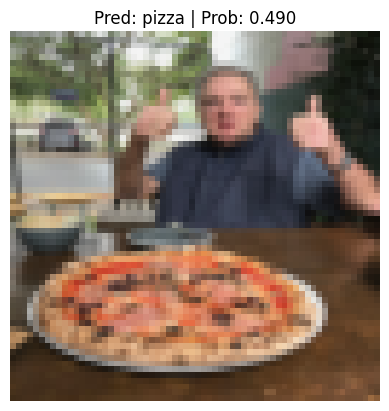

In [92]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_name,
                    transform=custom_image_transform,
                    device=device)



# <b> <p align="center"> <span style="color: green "> End (Half) of a Long Journey <span> </p> </b>